visualize benchmarking compact models here

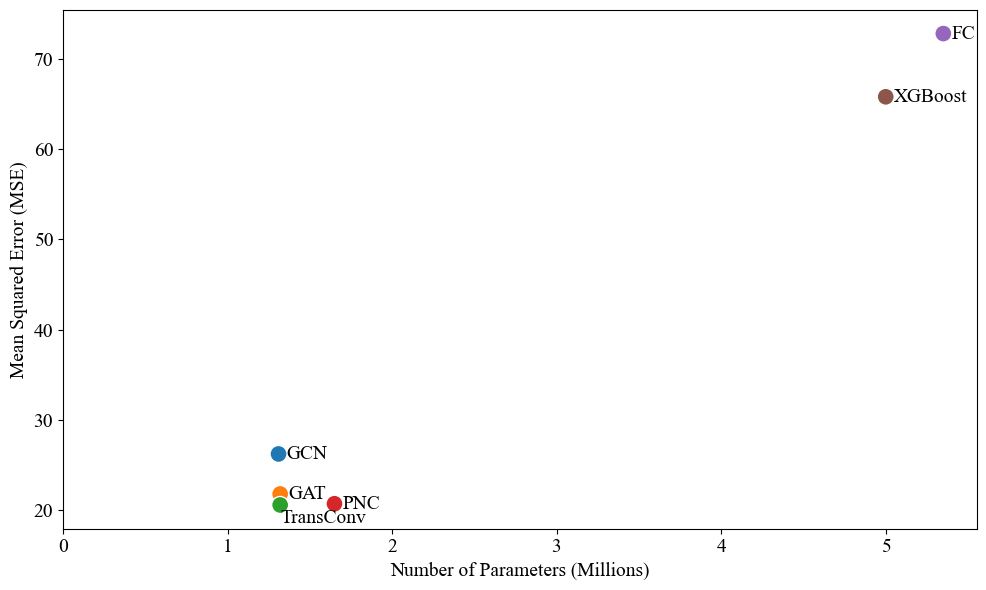

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

# Font
mpl.rcParams['font.family'] = 'Times New Roman'

# Data
data = {
    "Model": ["GCN", "GAT", "TransConv", "PNC", "FC", "XGBoost"],
    "Params (M)": [1.31, 1.32, 1.32, 1.65, 5.35, 5.0],
    "MSE": [26.22, 21.79, 20.57, 20.71, 72.77, 65.77],
    "Inference Time (ms)": [19.05, 22.45, 17.18, 30.45, 0.46, 0.46]
}
df = pd.DataFrame(data)

# Shared palette
palette = sns.color_palette("tab10", n_colors=len(df))
color_dict = dict(zip(df["Model"], palette))

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    data=df,
    x="Params (M)",
    y="MSE",
    hue="Model",
    palette=color_dict,
    s=150,
    legend=False
)

for i in range(df.shape[0]):
    x = df["Params (M)"][i] + 0.05
    y = df["MSE"][i]
    label = df["Model"][i]
    
    if label == "TransConv":
        ax.text(x - 0.05, y - 0.5, label, fontsize=14, ha='left', va='top')  # below the point
    else:
        ax.text(x, y, label, fontsize=14, ha='left', va='center')     # default (right, center aligned)

ax.set_xlabel("Number of Parameters (Millions)", fontsize=14)
ax.set_ylabel("Mean Squared Error (MSE)", fontsize=14)
ax.tick_params(labelsize=14)
ax.set_xlim(left=0)

plt.tight_layout()
plt.savefig("results/model_complexity_vs_mse.png", dpi=300)
plt.show()


/tmp/ipykernel_1859253/3677855225.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


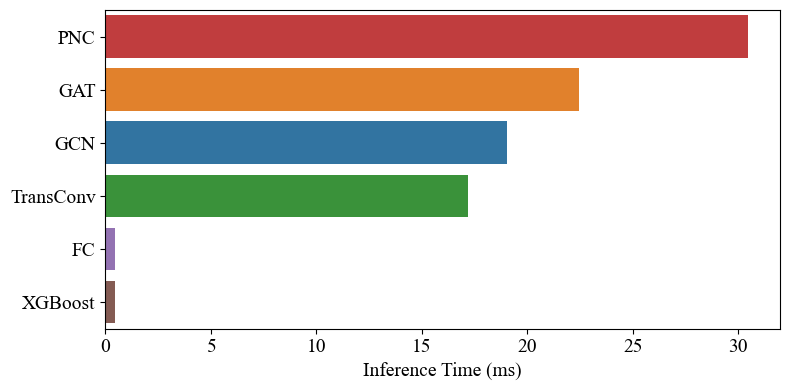

In [2]:
plt.figure(figsize=(8, 4))

df_sorted = df.sort_values("Inference Time (ms)", ascending=False)  # Descending sort

ax = sns.barplot(
    x="Inference Time (ms)",
    y="Model",
    data=df_sorted,
    palette=color_dict
)

ax.set_xlabel("Inference Time (ms)", fontsize=14)
ax.set_ylabel("")
ax.tick_params(labelsize=14)
plt.tight_layout()
plt.savefig("results/inference_time_by_model.png", dpi=300)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.optimize import curve_fit

# Set font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Data from the table
data = {
    'Pyramid (512)': {'params': 1.06, 'mse': 23.67},
    'Pyramid (256)': {'params': 0.33, 'mse': 21.72},
    'Pyramid (512) (from Table)': {'params': 1.32, 'mse': 20.57},
    'Pyramid (256) (2 Heads) + GN': {'params': 0.33, 'mse': 19.53},
    'Pyramid (256) + GN': {'params': 0.35, 'mse': 18.25},
    'Pyramid (256) + GN (9L)': {'params': 0.43, 'mse': 18.09},
    'Pyramid (256) + GN (11L)': {'params': 0.76, 'mse': 15.99},
    'Pyramid (256) + GN (13L)': {'params': 0.78, 'mse': 16.24},
    'Pyramid (384) + GN': {'params': 1.58, 'mse': 14.30},
    'Pyramid (512) + GN': {'params': 3.15, 'mse': 13.32},
    'Uniform (192) + Res. + GN': {'params': 3.28, 'mse': 11.16},
    'Wide Pyramid (512) + Res. + GN': {'params': 20.34, 'mse': 10.52},
    'Uniform (256) + Res. + GN': {'params': 7.92, 'mse': 11.26},
    'Wide Pyramid (256) + Res. + GN': {'params': 12.75, 'mse': 10.29}
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define start and end colors (can use names or RGB tuples)
start_color = "#1f77b4"  # Dark blue
end_color = "#ff69b4"    # Light orange

# Extract parameter values
param_values = np.array([v['params'] for v in data.values()])

# Normalize parameter values to [0, 1]
norm = (param_values - param_values.min()) / (param_values.max() - param_values.min())

# Create the custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", [start_color, end_color])

# Map normalized param values to colors using the colormap
colors = [custom_cmap(val) for val in norm]


# Plot each point with different styles based on architecture
for (model_name, values), color in zip(data.items(), colors):
    if 'Wide Pyramid' in model_name:
        marker = 'D'  # Diamond
    elif 'Uniform' in model_name:
        marker = 's'  # Square
    else:  # Pyramid
        marker = 'o'  # Circle
    
    ax.scatter(values['params'], values['mse'], 
              label=model_name,  # Label all models
              color=color,
              marker=marker,
              s=100,  # size of points
              alpha=0.8)

# Add horizontal line at MSE = 8.57 with label
line = ax.axhline(y=8.57, color='grey', linestyle='--', alpha=0.7, 
           label='Estimation of simulation noise')

# Customize the plot
ax.set_xlabel('Number of Parameters', fontsize=12)
ax.set_ylabel('MSE', fontsize=12)
# ax.set_title('Model Performance vs. Complexity', fontsize=14)

# Set axis limits to start from 0
ax.set_xlim(0, max(v['params'] for v in data.values()) * 1.1)
ax.set_ylim(0, max(v['mse'] for v in data.values()) * 1.1)

# Add legend with all models
handles, labels = ax.get_legend_handles_labels()

# Separate model entries from the horizontal line
model_handles_labels = [(h, l) for h, l in zip(handles, labels) if l in data]
line_handles_labels = [(h, l) for h, l in zip(handles, labels) if l == 'Estimation of simulation noise']

# Sort model entries by number of parameters
sorted_model_entries = sorted(
    model_handles_labels,
    key=lambda hl: data[hl[1]]['params']
)

# Extract x and y data
params = np.array([v['params'] for v in data.values()])
mse = np.array([v['mse'] for v in data.values()])

# Define the power-law function
def power_law(x, a, b):
    return a * np.power(x, b)

# Fit the power-law curve
popt, _ = curve_fit(power_law, params, mse)
a_fit, b_fit = popt
print(f"Fitted power-law: MSE = {a_fit:.3f} * (params)^{b_fit:.3f}")

# Generate points for the fit line
x_fit = np.linspace(min(params), max(params), 100)
y_fit = power_law(x_fit, *popt)


# Plot the fit line on the same axis
fit_line, = ax.plot(
    x_fit, y_fit, linestyle='--', color="#ff69b4",
    label='Power-law fit', linewidth=0.8
)

# Append the fit line to the legend entries
sorted_handles_labels = sorted_model_entries + line_handles_labels + [(fit_line, 'Power-law fit')]

# Unzip into handles and labels again
handles, labels = zip(*sorted_handles_labels)

# Add final legend
ax.legend(
    handles,
    labels,
    title='Architectures',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=10
)

plt.tight_layout()

# Save the figure
plt.savefig('results/model_comparison.png', dpi=300, bbox_inches='tight')
plt.close()

Fitted power-law: MSE = 16.895 * (params)^-0.168
